In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [27]:
df=pd.read_csv('DS2_C6_S1_Income_Data_Challenge.csv')

In [28]:
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [29]:
df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

In [30]:
df.shape

(32561, 14)

In [31]:
df.describe()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# TASK2

In [32]:
df.isna().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [33]:
df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

In [34]:
df[['WorkClass','Education','Marital_Status','Occupation','Relationship','Gender','Native_Country','Income_Bracket']]=df[['WorkClass','Education','Marital_Status','Occupation','Relationship','Gender','Native_Country','Income_Bracket']].astype('category')

In [35]:
df.dtypes

Age                  int64
WorkClass         category
Fnlwgt               int64
Education         category
Education_Num        int64
Marital_Status    category
Occupation        category
Relationship      category
Gender            category
Capital_Gain         int64
Capital_Loss         int64
Hours_Per_Week       int64
Native_Country    category
Income_Bracket    category
dtype: object

In [36]:
LabelEncoder=preprocessing.LabelEncoder()

In [37]:
df['WorkClass']= LabelEncoder.fit_transform(df['WorkClass'])
df['Education']=LabelEncoder.fit_transform(df['Education'])
df['Marital_Status'] = LabelEncoder.fit_transform(df['Marital_Status'])
df['Occupation'] = LabelEncoder.fit_transform(df['Occupation'])
df['Relationship'] = LabelEncoder.fit_transform(df['Relationship'])
df['Gender'] = LabelEncoder.fit_transform(df['Gender'])
df['Native_Country'] = LabelEncoder.fit_transform(df['Native_Country'])
df['Income_Bracket'] = LabelEncoder.fit_transform(df['Income_Bracket']) #<=50k=0 <50k =1

In [38]:
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,9,13,4,1,1,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,0,0,0,40,5,0


In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [40]:
X = df.drop('Income_Bracket',axis=1)
y=df['Income_Bracket']
X= pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
scaled_df = pd.concat([X,y],axis=1)

In [41]:
corr=pd.concat([X,y],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
Age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
WorkClass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
Fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
Education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
Education_Num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
Marital_Status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
Occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
Relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
Gender,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980
Capital_Gain,0.077674,0.033835,0.000432,0.030046,0.122630,-0.043393,0.025505,-0.057919,0.048480,1.000000,-0.031615,0.078409,-0.001982,0.223329


#### Spliting using train_test_split

In [42]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train, y_test= train_test_split(X,y,train_size=0.8)

#### Splitting using row index method

In [43]:
train_num=int(len(scaled_df)*0.8)
train=scaled_df.iloc[:train_num,:]
test=scaled_df.iloc[(train_num+1):,:]
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]
y_train=train.Income_Bracket
y_test=test.Income_Bracket

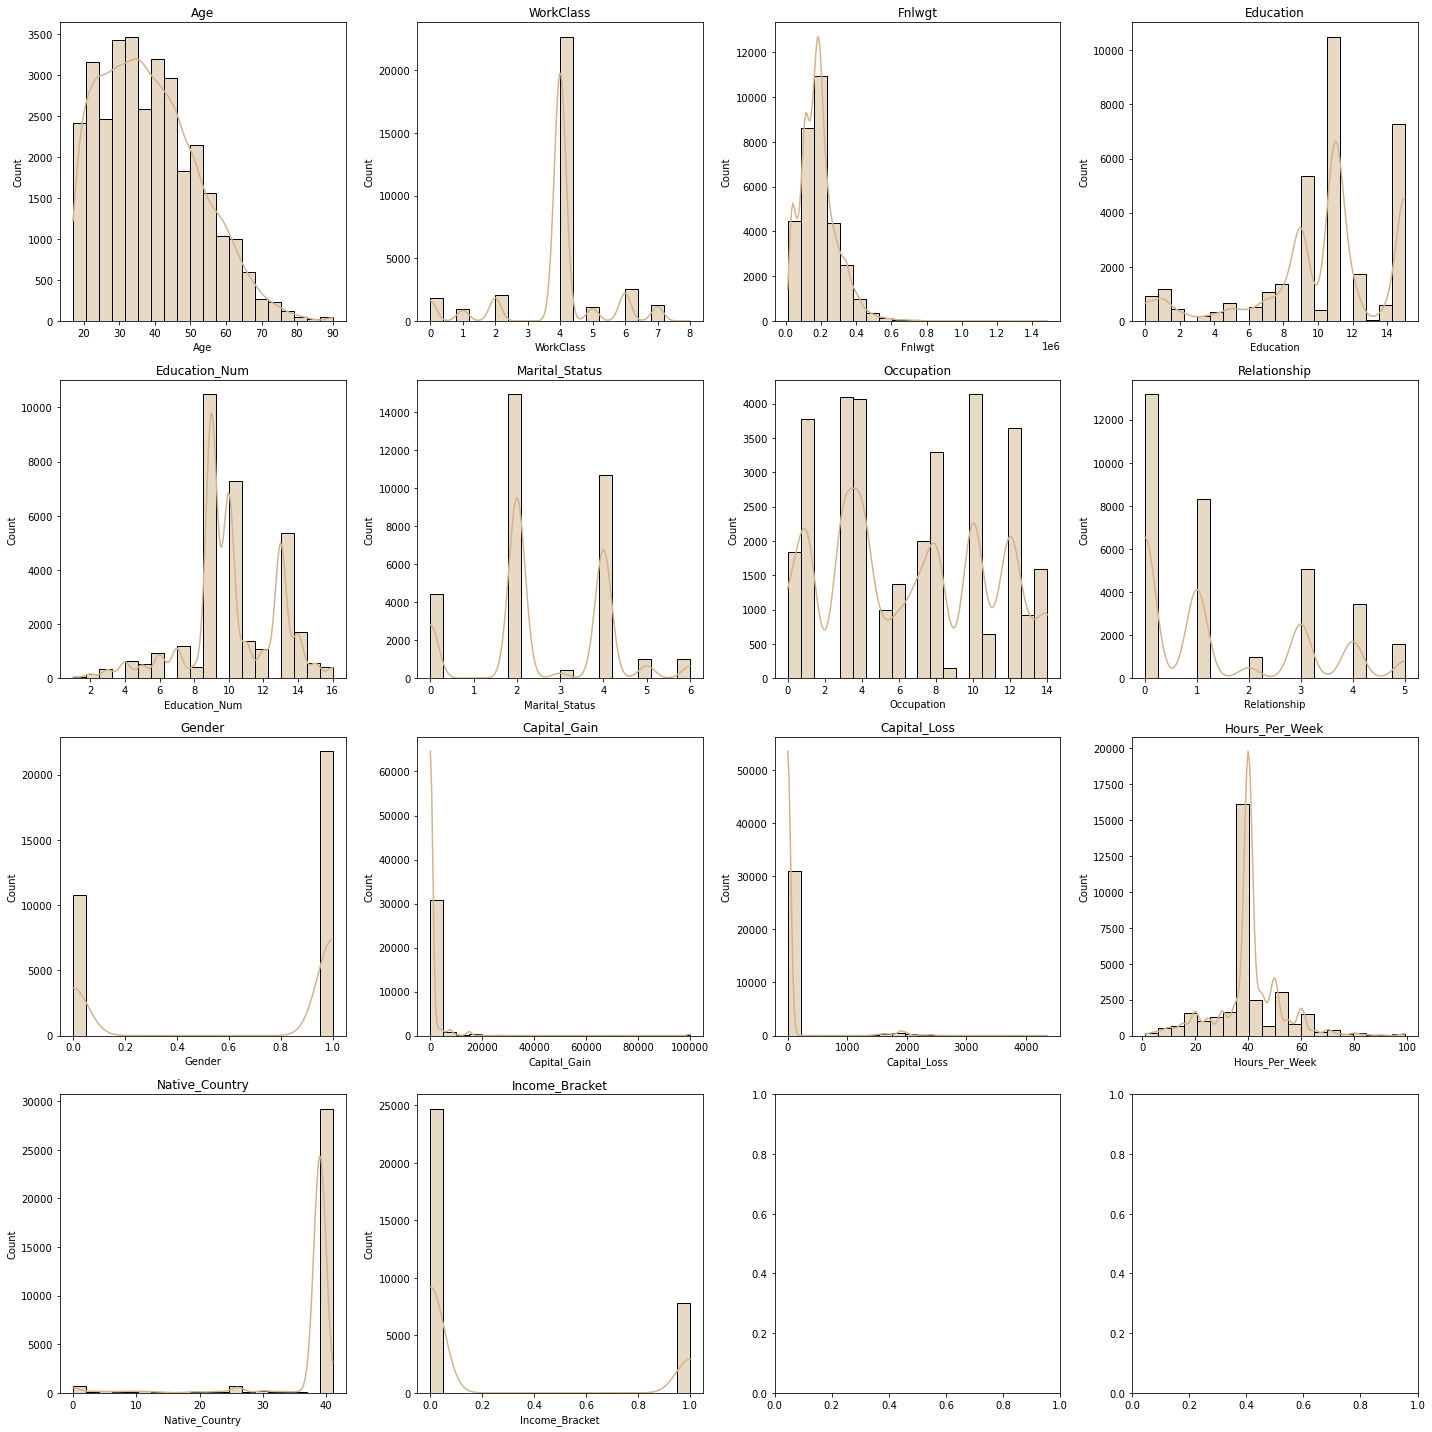

In [63]:
numerics=['int16','int32','int64','float16','float32','float64']
con_df=df.select_dtypes(include=numerics)
con_cols=con_df.columns
num_cols=4
n_bins=20
num_rows=int(len(con_cols)/num_cols)+1

figs,axes =plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(20,20))

for col ,ax in zip(con_cols,axes.flatten()[:len(con_cols)]):
    sns.histplot(con_df[col],bins=n_bins,kde=True,ax=ax,color='tan',edgecolor='black')
    ax.set_title(col)
plt.show()

# TASK3

In [45]:
from sklearn.neighbors import KNeighborsClassifier 

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [47]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
knn_model.score(X_test, y_test)

0.8218673218673219

In [49]:
y_pred= knn_model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [51]:
print(accuracy_score(y_test,y_pred))

0.8218673218673219


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4912
           1       0.65      0.59      0.62      1600

    accuracy                           0.82      6512
   macro avg       0.76      0.74      0.75      6512
weighted avg       0.82      0.82      0.82      6512



# TASK 4

In [53]:
dic = {}
score_1 = []
for i in range(1,20,2):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    score=knn_model.score(X_test, y_test)
    score_1.append(score)
    dic.update({i:score})

MaxScore = max(zip(dic.values(), dic.keys()))[1]
print('To get the better accuracy we should consider K values =',MaxScore)

To get the better accuracy we should consider K values = 19


In [54]:
knn_model = KNeighborsClassifier(n_neighbors=13)

In [55]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [56]:
y_pred= knn_model.predict(X_test)

In [57]:
print(accuracy_score(y_test,y_pred))

0.8350737100737101


In [58]:
dic

{1: 0.7994471744471745,
 3: 0.8218673218673219,
 5: 0.8298525798525799,
 7: 0.8327702702702703,
 9: 0.8330773955773956,
 11: 0.8376842751842751,
 13: 0.8350737100737101,
 15: 0.8373771498771498,
 17: 0.8392199017199017,
 19: 0.8392199017199017}

#### Error

In [59]:
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

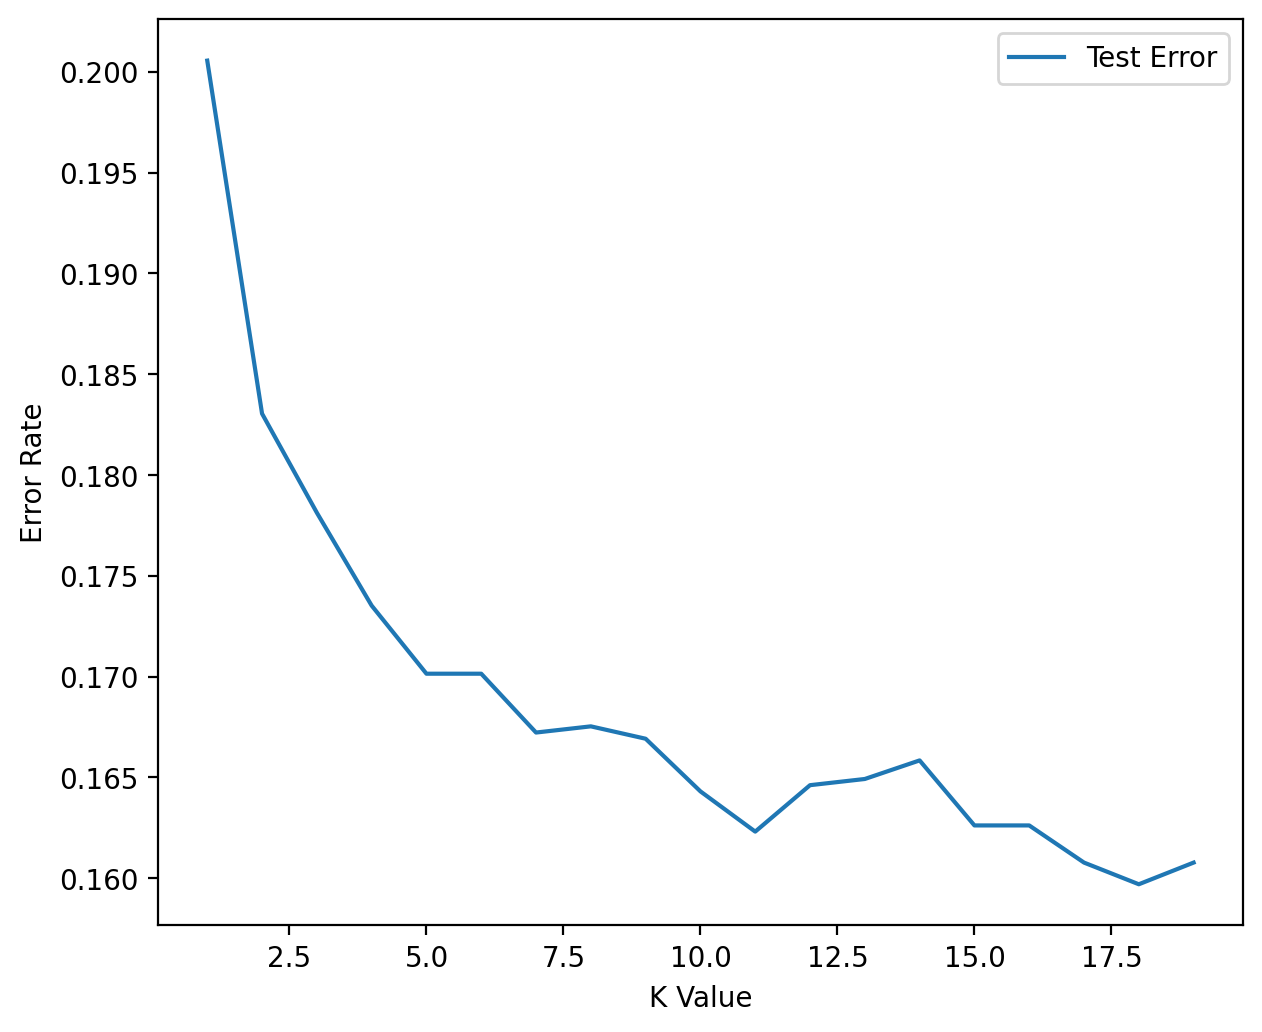

In [60]:
plt.figure(figsize=(7,6),dpi=200)
plt.plot(range(1,20),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

Text(0.5, 0, 'K Value')

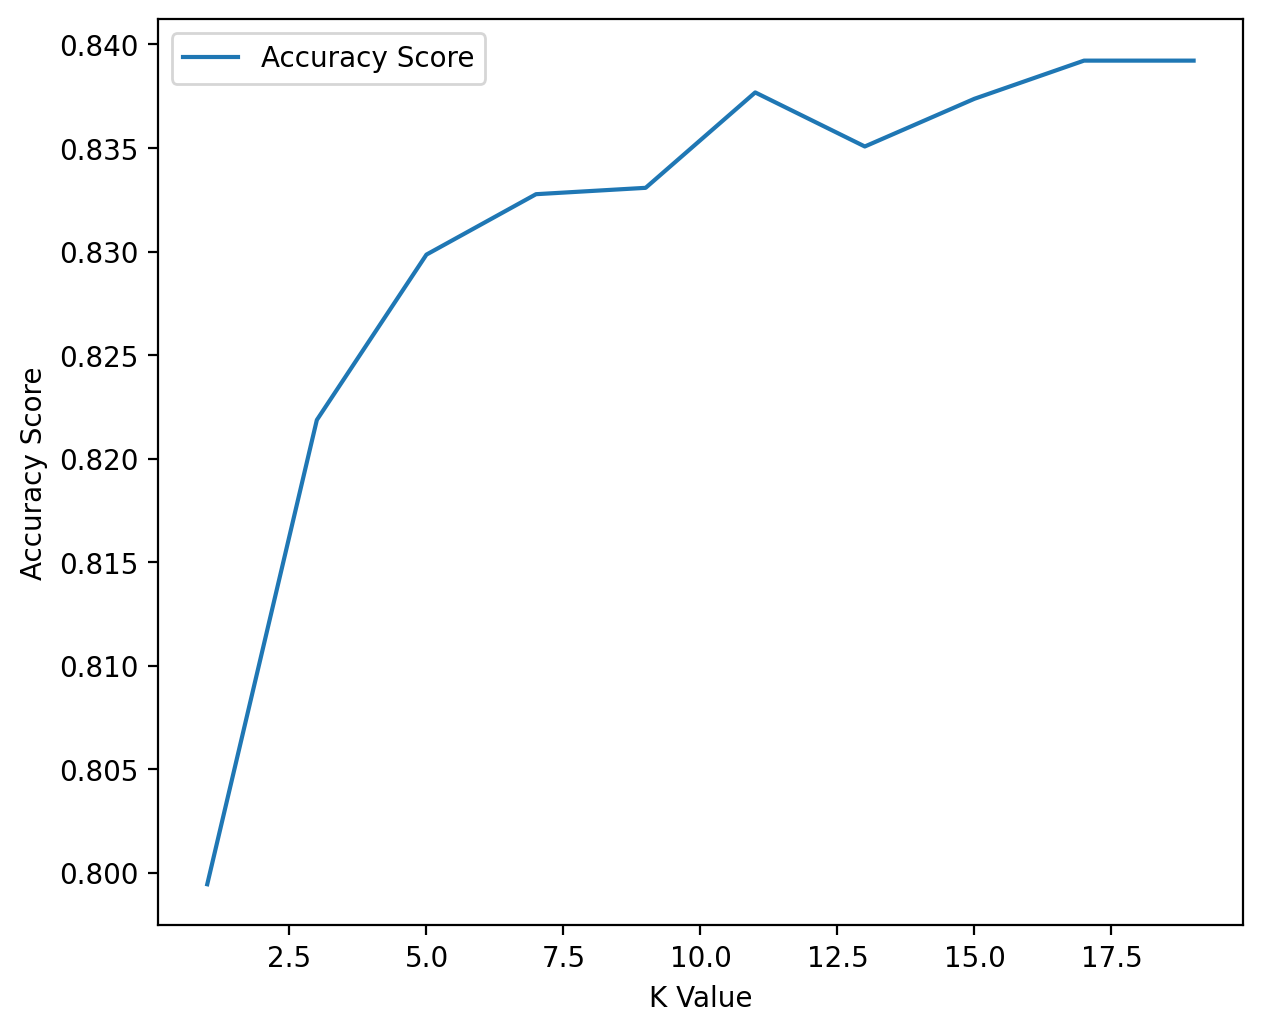

In [61]:
plt.figure(figsize=(7,6),dpi=200)
plt.plot(range(1,20,2),score_1,label='Accuracy Score')
plt.legend()
plt.ylabel('Accuracy Score')
plt.xlabel("K Value")